In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 39.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 29.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 20.8 MB/s eta 0:00:00


In [ ]:
from datasets import load_dataset
import pandas as pd
dataset = load_dataset("ar_sarcasm")
train_dataset = dataset["train"]
df = pd.DataFrame({"dialect": train_dataset["dialect"], "sarcasm": train_dataset["sarcasm"] ,
                   "sentiment": train_dataset["sentiment"] , "original_sentiment": train_dataset["original_sentiment"] ,
                   "tweet": train_dataset["tweet"] , "source": train_dataset["source"]
                   })

Generating train split:   0%|          | 0/8437 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2110 [00:00<?, ? examples/s]

Dataset ar_sarcasm downloaded and prepared to /root/.cache/huggingface/datasets/ar_sarcasm/default/1.0.0/2e2aad7fa94fad1d8baf3905775cd264e1429dc686b1a1dac1d2545e795d30f0. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
df

,dialect,sarcasm,sentiment,original_sentiment,tweet,source
0,1,0,0,0,نصيحه ما عمرك اتنزل لعبة سوبر ماريو مش زي ما ك...,semeval
1,4,0,1,2,#نادين_نسيب_نجيم ❤️❤️❤️مجلة #ماري_كلير 💭#ملكة_...,semeval
2,0,0,1,1,@Alito_NBA اتوقع انه بيستمر,semeval
3,2,1,1,0,"@KSA24 يعني ""بموافقتنا"" لأن دمشق صايرة موسكو",semeval
4,4,0,1,0,RT @alaahmad20: قائد في الحرس يعترف بفقدان الس...,semeval
...,...,...,...,...,...,...
8432,4,0,1,1,RT @iDhmi: #توصيات_تويتسو | تطبيق يوتيوب الأطف...,semeval
8433,4,0,1,1,سي بي سي:#إبراهيم_محلب يشارك باحتفالية تنزانيا...,astd
8434,4,1,0,0,كلب إسرائيل وسيفها الإرهابي بوتن قاتل النساء و...,semeval
8435,4,1,0,0,احمد فتفت صار مغضوب عليه بمجرد اعترضو على ميش...,semeval


In [ ]:
df['text'] =df['tweet']

In [ ]:
df = df.drop('tweet', axis=1)

In [ ]:
# df['labels'] = df['label'].replace({'negative': 0, 'positive': 1})
df['labels'] = df['original_sentiment']

In [ ]:
df = df.drop('original_sentiment', axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
# Split data into train and eval DataFrames
train_df, eval_df = train_test_split(df, test_size=0.2, random_state=42)

# Print the shapes of train_df and eval_df
print("Train DataFrame shape:", train_df.shape)
print("Eval DataFrame shape:", eval_df.shape)

Train DataFrame shape: (6749, 6)
Eval DataFrame shape: (1688, 6)


In [ ]:
!pip install simpletransformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.7/250.7 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 74.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 93.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 114.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 121.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 89.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 93.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.4/209.4 kB 30.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━

<Axes: xlabel='labels', ylabel='count'>

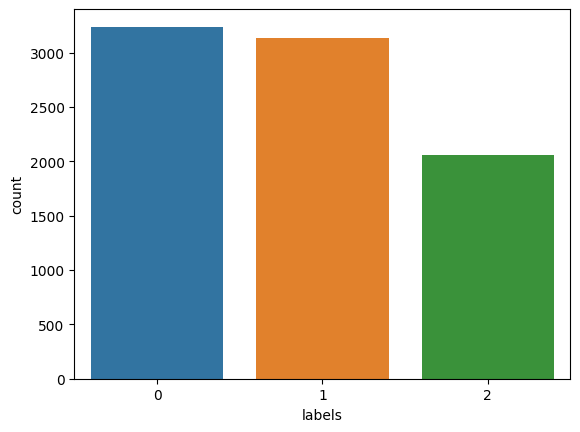

In [ ]:
import seaborn as sns
sns.countplot(x=df["labels"])

In [ ]:
from simpletransformers.classification import ClassificationModel, ClassificationArgs
import pandas as pd
import logging


logging.basicConfig(level=logging.INFO)
transformers_logger = logging.getLogger("transformers")
transformers_logger.setLevel(logging.WARNING)

"""# Preparing train data
train_data = [
    ["Aragorn was the heir of Isildur", 1],
    ["Frodo was the heir of Isildur", 0],
    ["Pippin is stronger than Merry", 2],
]
train_df = pd.DataFrame(train_data)
train_df.columns = ["text", "labels"]

# Preparing eval data
eval_data = [
    ["Aragorn was the heir of Elendil", 1],
    ["Sam was the heir of Isildur", 0],
    ["Merrry is stronger than Pippin", 2],
]
eval_df = pd.DataFrame(eval_data)
eval_df.columns = ["text", "labels"]"""

# Optional model configuration
model_args = ClassificationArgs(num_train_epochs=3)

# Create a ClassificationModel
model = ClassificationModel(
    'bert',
    'asafaya/bert-base-arabic',
    num_labels=3,
    args=model_args,
    # use_cuda= False
)

# Train the model
model.train_model(train_df)

# Evaluate the model
result, model_outputs, wrong_predictions = model.eval_model(eval_df)

# Make predictions with the model
#predictions, raw_outputs = model.predict(["Sam was a Wizard"])


Some weights of the model checkpoint at asafaya/bert-base-arabic were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at asafaya/bert-base-arabic and are newly initialized: ['classifier.weight', 'classifier.

  0%|          | 0/6749 [00:00<?, ?it/s]

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 0 of 3:   0%|          | 0/844 [00:00<?, ?it/s]

Running Epoch 1 of 3:   0%|          | 0/844 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/844 [00:00<?, ?it/s]

  0%|          | 0/1688 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/211 [00:00<?, ?it/s]

In [ ]:
result

{'mcc': 0.5268374180568042, 'eval_loss': 1.4086079009901291}

In [ ]:
predictions, raw_outputs = model.predict(["الموت"])
predictions

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

array([0])